## Ejercicio

Plantee un ejercicio, a su gusto, donde sea posible hacer uso de los distintos tipos de Diseño de Experimentos:


*   ANOVA de un Factor (Efectos Fijos)
*   Anova de un Factor (Efectos Aleatorios)
*   Diseño por Bloques
*   Diseño Factorial (Dos Factores)
*   Cuadrado Latino


### Planteamiento del problema

Una empresa de telecomunicaciones de una ciudad revisa la velocidad de internet promedio por casa, las cuales tienen teoricamente contratadas 50 megas. Para la investigación de la empresa, esta contacta con las empresas que trabajan en dicha localidad, a lo que luego, buscan datos estadisticos sobre el tipo de conexión y cuantos equipos conectados a internet se encuentran en cada casa.

Los valores estan dados en megas promedio a lo largo del dia.  
Los operadores estan identificados con las letras X, Y ,Z.  
La cantidad de equipos es considerada entre 1 y 5 como 1; entre 6 y 10 como 2; entre 11 y 20 como 3.  
Por ultimo el tipo de conexión esta dado por: A como conexión coaxial, B como conexión por fibra optica y C como conexión satelital.

## ANOVA: Efectos Fijos

Para el caso de Anova de efectos fijos, se tomo como variable principal el tipo de conexión para ver como es la variación de velocidad recibida por cada medio de transporte de datos. Por ende los datos se clasificaron de la siguiente manera:

| M  | Conexión     | M  | Conexión     | M  | Conexión     |
|----|--------------|----|--------------|----|--------------|
| 32 | A            | 51 | B            | 29 | C            |
| 37 | A            | 56 | B            | 39 | C            |
| 45 | A            | 54 | B            | 41 | C            |
| 50 | A            | 47 | B            | 38 | C            |
| 28 | A            | 38 | B            | 39 | C            |
| 32 | A            | 42 | B            | 49 | C            |
| 52 | A            | 53 | B            | 42 | C            |


In [8]:
# Leemos los datos
data<-read.table("data/ANOVAEF.txt",header=T,dec=",",sep="\t")
head(data)

Velocidad,Conexion
32,1
37,1
45,1
50,1
28,1
32,1


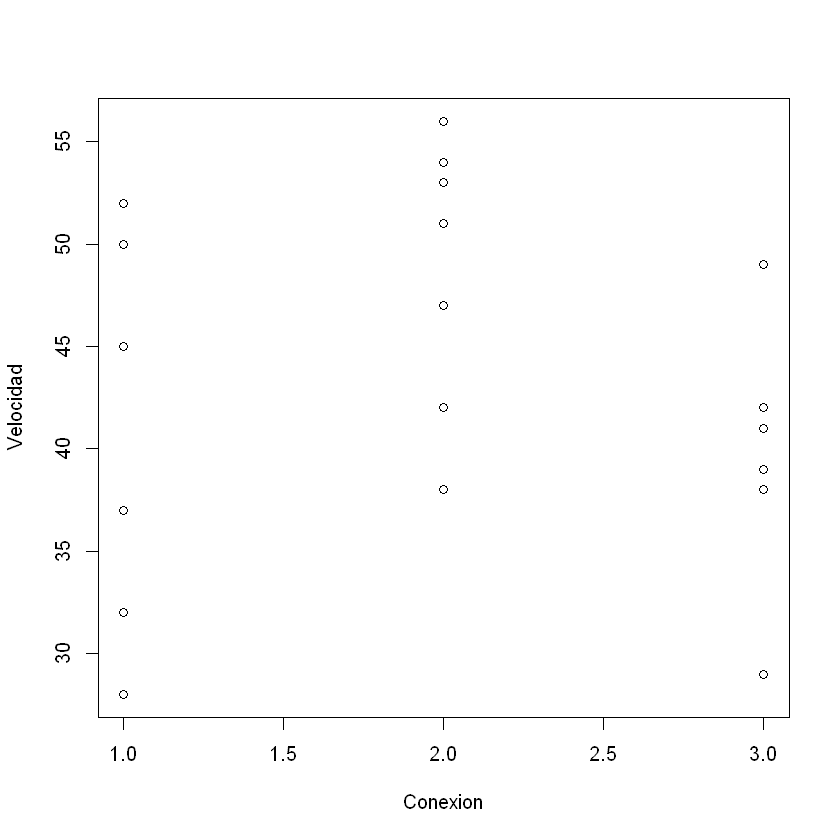

In [11]:
# Grafica de disperción de datos
with(data, plot(Conexion,Velocidad))

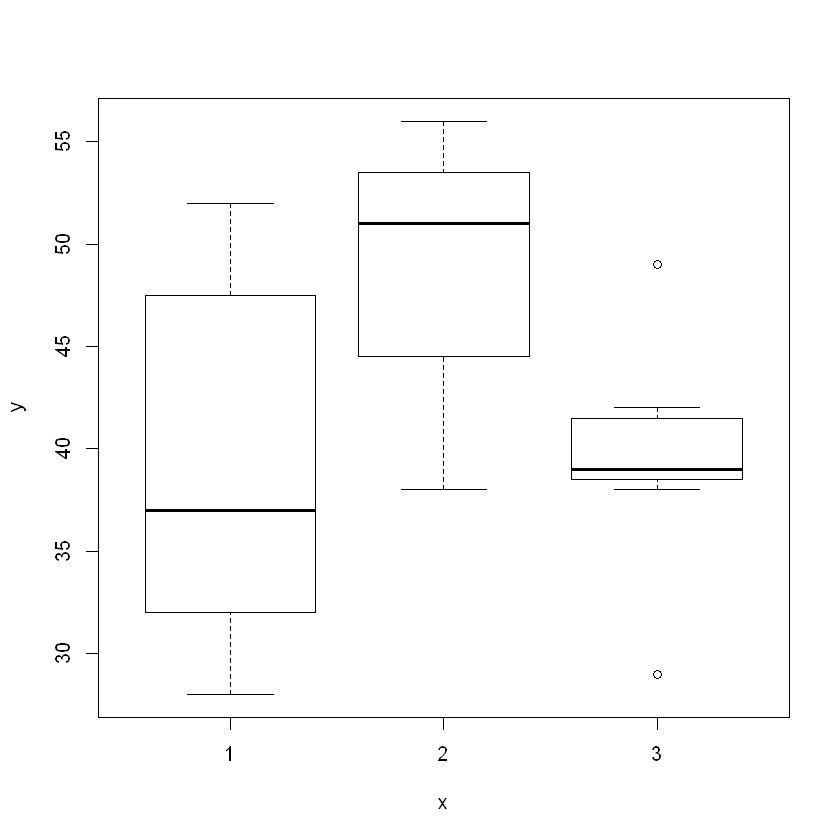

In [13]:
# Convertimos en Factor la variable y volvemos a graficar
data$Conexion<-factor(data$Conexion)
with(data, plot(Conexion,Velocidad))

In [15]:
# Vamos a hacerlo creando los objetos tipo modelo
m.aov<-lm(Velocidad~Conexion,data=data)
summary(m.aov)


Call:
lm(formula = Velocidad ~ Conexion, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4286  -6.7143  -0.5714   5.2857  12.5714 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.4286     2.8548  13.812 5.09e-11 ***
Conexion2     9.2857     4.0372   2.300   0.0336 *  
Conexion3     0.1429     4.0372   0.035   0.9722    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.553 on 18 degrees of freedom
Multiple R-squared:  0.2785,	Adjusted R-squared:  0.1983 
F-statistic: 3.473 on 2 and 18 DF,  p-value: 0.05301


In [16]:
# La ANOVA en detalle
aov.m<-aov(m.aov)
summary(aov.m)

            Df Sum Sq Mean Sq F value Pr(>F)  
Conexion     2  396.3  198.14   3.473  0.053 .
Residuals   18 1026.9   57.05                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [17]:
# Test de comparación de medias:
attach(data)
library(stats)
pairwise.t.test(Velocidad,Conexion)


	Pairwise comparisons using t tests with pooled SD 

data:  Velocidad and Conexion 

  1    2   
2 0.10 -   
3 0.97 0.10

P value adjustment method: holm 

In [18]:
# El test de Tukey que nos permite revisar si, efectivamente, se observan diferencias entre niveles
tk.aov.m<-TukeyHSD(aov.m)
tk.aov.m

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = m.aov)

$Conexion
          diff        lwr       upr     p adj
2-1  9.2857143  -1.017985 19.589414 0.0815214
3-1  0.1428571 -10.160842 10.446556 0.9993100
3-2 -9.1428571 -19.446556  1.160842 0.0871391


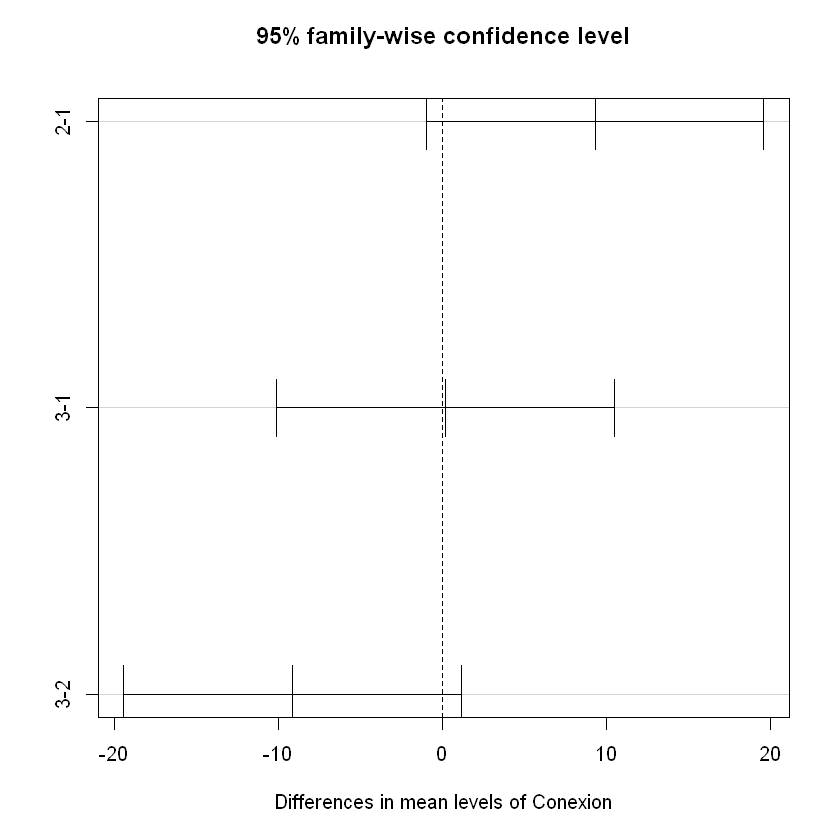

In [19]:
# Y el gráfico
plot(tk.aov.m)

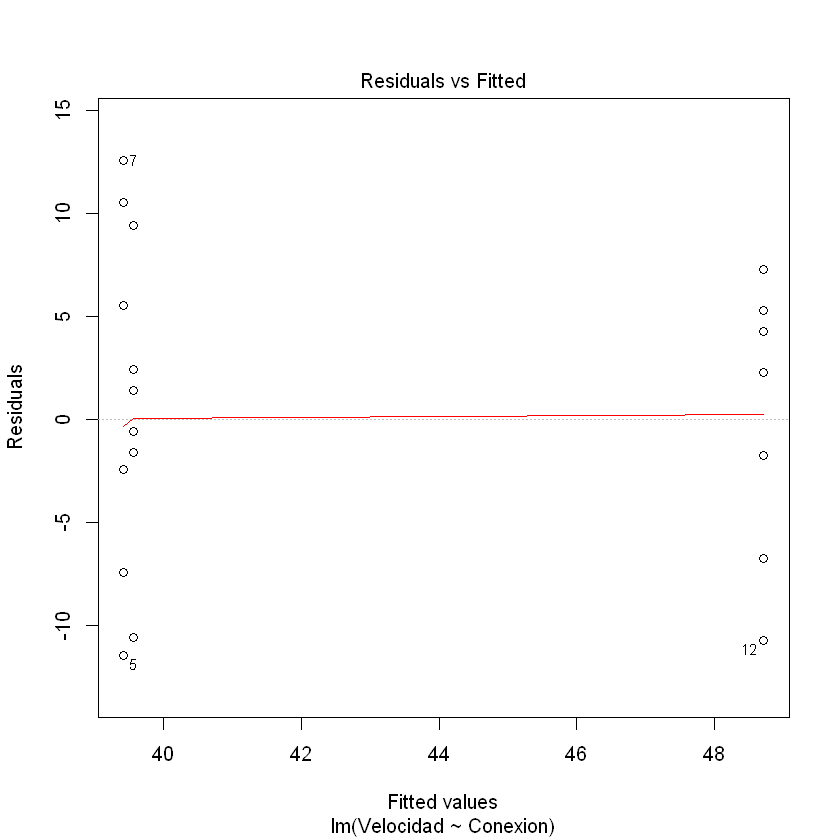

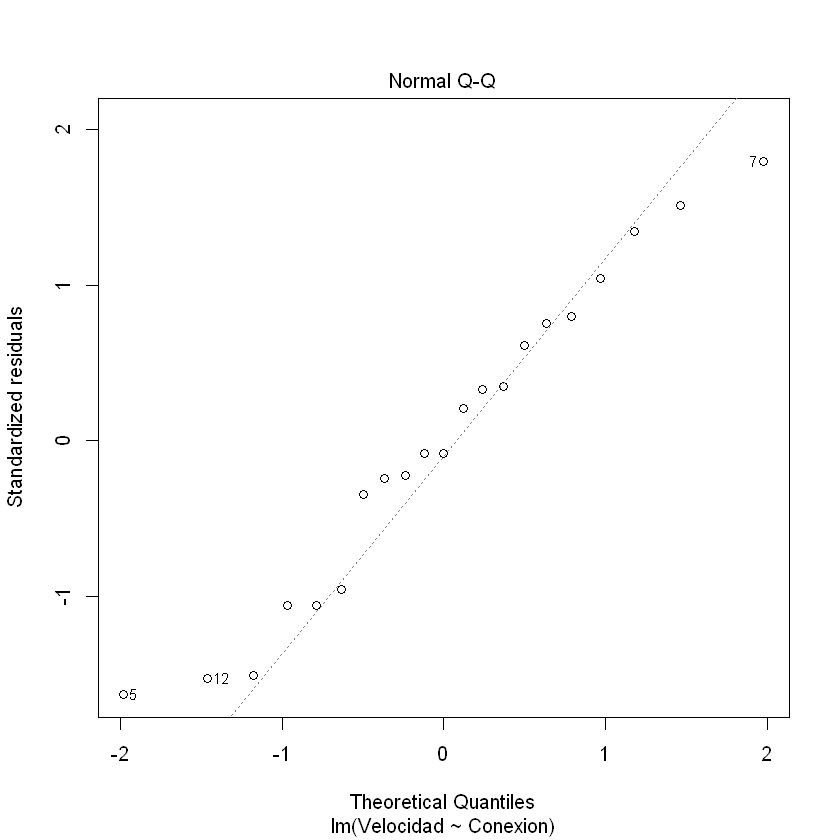

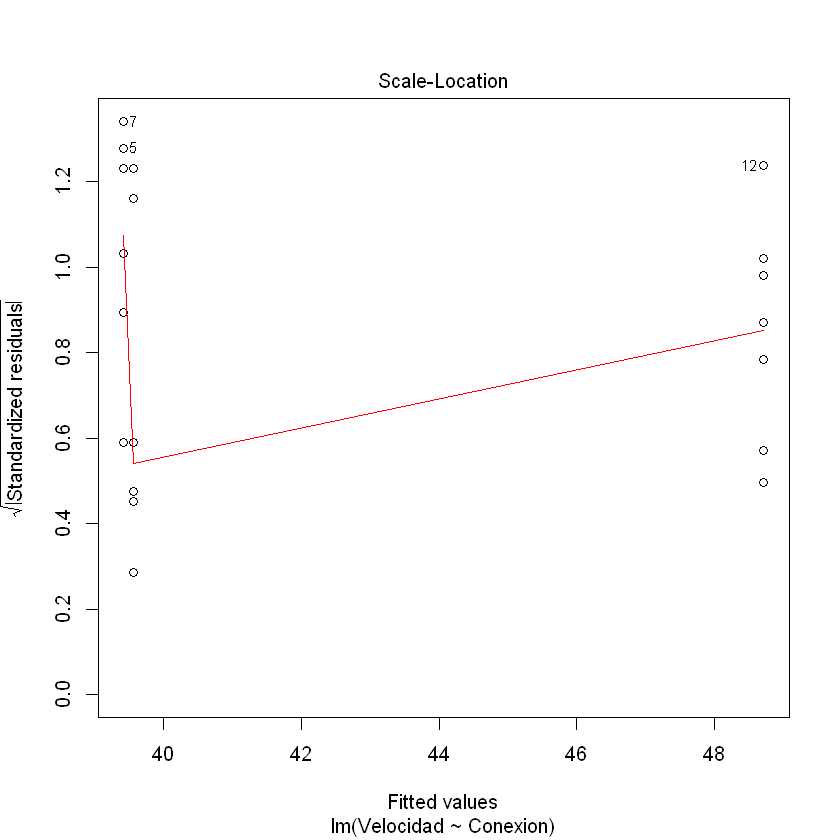

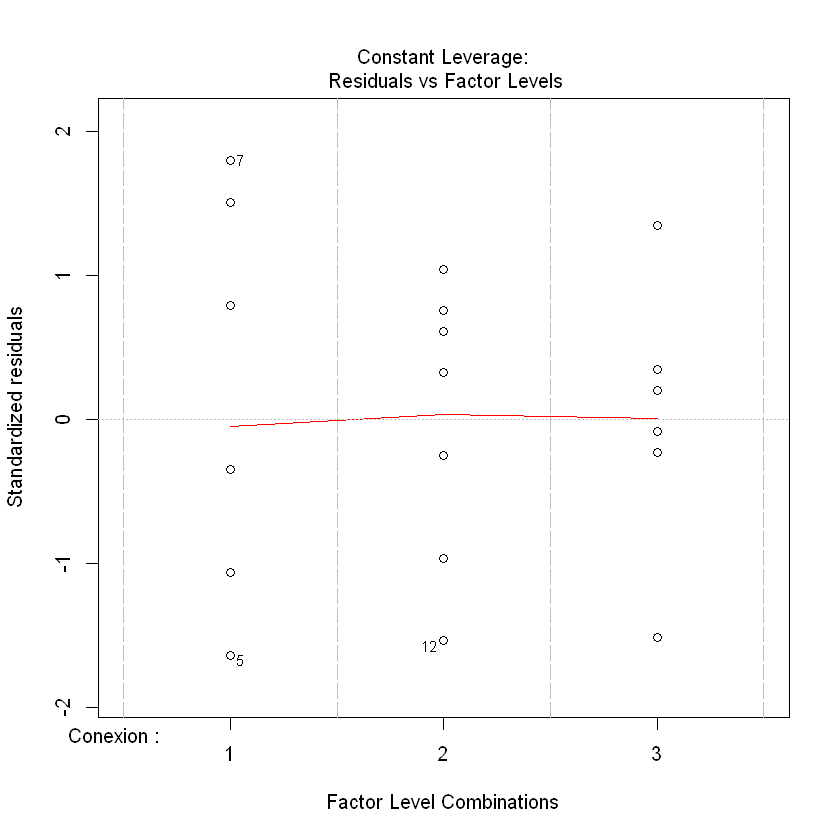

In [20]:
plot(m.aov)

Como podemos ver el tipo conexión es un factor importante, si bien no influye en gran forma si da su aporte correlacional a la velocidad. Ahora bien, la forma en que diferencian los datos con respecto al de Fibra Optica es grande, tanto en disperción, en la cual la satelital sobresale. Quiza por motivos de caida de internet a cortos periodos de tiempo. La otra variable que afecta la diferencia es la media de los datos de cada una. Podemos ver como en la conexión coaxial disminuye en gran forma con respecto a la segunda que es la firba opctica.

En resumen, se puede apreciar la variabilidad de contratar distintos tipos de conexión, siendo la fibra optica la mejor candidata por su media y poca desviación entre su suministro de datos.

## ANOVA: Efectos Aleatorios

Para el caso de Anova de efectos aleatorios, se tomo como variable principal la cantidad de equipos accesando a internet para ver como es la variación de velocidad. Por ende los datos se clasificaron de la siguiente manera:

| M  | Equipos      | M  | Equipos      | M  | Equipos      |
|----|--------------|----|--------------|----|--------------|
| 47 | 1            | 47 | 2            | 29 | 3            |
| 37 | 1            | 43 | 2            | 37 | 3            |
| 53 | 1            | 38 | 2            | 42 | 3            |
| 56 | 1            | 35 | 2            | 38 | 3            |
| 42 | 1            | 43 | 2            | 39 | 3            |
| 49 | 1            | 39 | 2            | 36 | 3            |
| 39 | 1            | 42 | 2            | 42 | 3            |

Recordemos que los numeros 1,2 y 3 en la tabla representan la categoria cantidad de equipos como se planteo al principion, es decir, no son esa cantidad de equipos coenctados.

In [39]:
# Leemos los datos
data<-read.table("data/ANOVAEA.txt",header=T,dec=",",sep="\t")
head(data)


Velocidad,Equipos
47,1
37,1
53,1
56,1
42,1
49,1


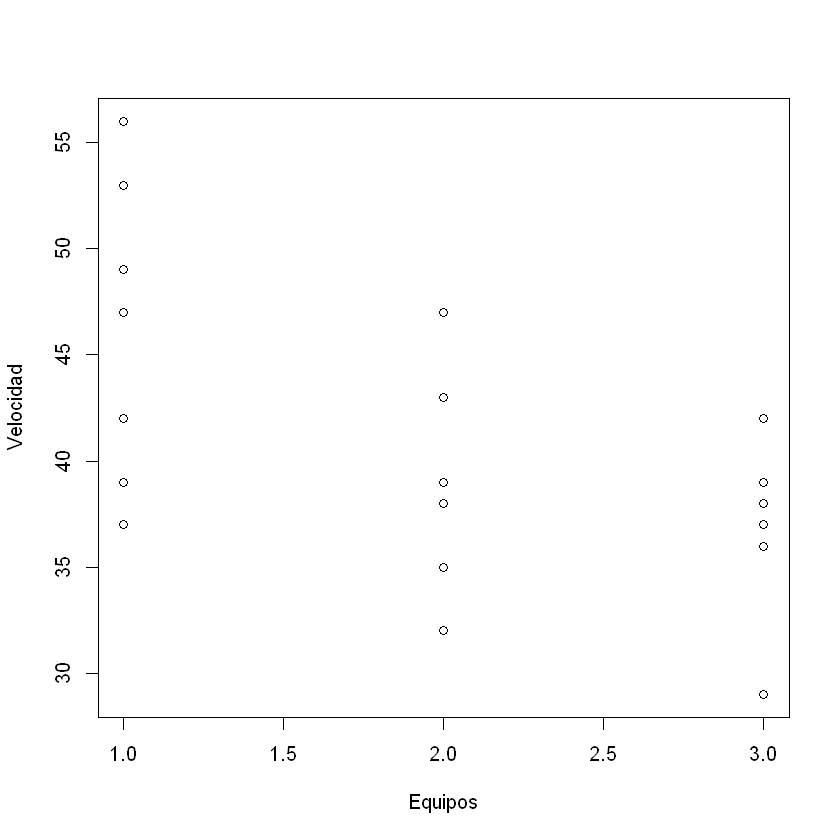

In [23]:
# Grafica de disperción de datos
with(data, plot(Equipos,Velocidad))

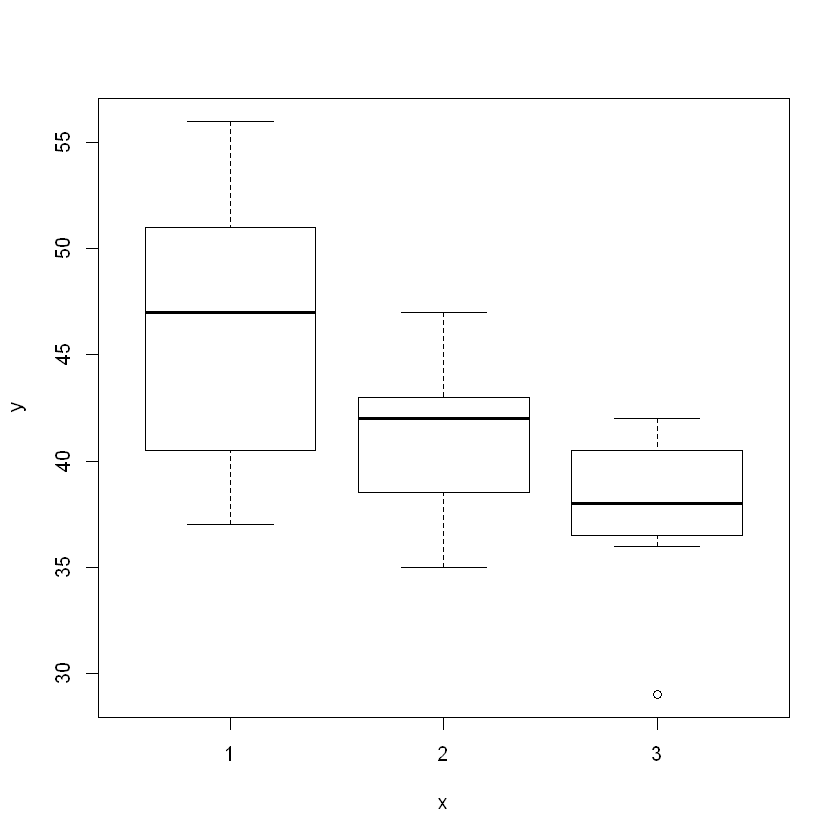

In [35]:
# Convertimos en Factor la variable y volvemos a graficar
data$Equipos<-factor(data$Equipos)
with(data, plot(Equipos,Velocidad))

In [26]:
# Vamos a hacerlo creando los objetos tipo modelo
m.aov<-lm(Velocidad~Equipos,data=data)
summary(m.aov)


Call:
lm(formula = Velocidad ~ Equipos, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1429 -4.1429  0.4286  3.4286  9.8571 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   46.143      2.150  21.465 2.83e-14 ***
Equipos2      -6.571      3.040  -2.162   0.0444 *  
Equipos3      -8.571      3.040  -2.819   0.0114 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.688 on 18 degrees of freedom
Multiple R-squared:  0.3259,	Adjusted R-squared:  0.251 
F-statistic: 4.351 on 2 and 18 DF,  p-value: 0.02874


In [27]:
# La ANOVA en detalle
aov.m<-aov(m.aov)
summary(aov.m)

            Df Sum Sq Mean Sq F value Pr(>F)  
Equipos      2  281.5  140.76   4.351 0.0287 *
Residuals   18  582.3   32.35                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [30]:
# Test de comparación de medias:
attach(data)
library(stats)
pairwise.t.test(Velocidad,Equipos)

The following objects are masked from data (pos = 3):

    Equipos, Velocidad

The following objects are masked from data (pos = 4):

    Equipos, Velocidad

The following object is masked from data (pos = 5):

    Velocidad




	Pairwise comparisons using t tests with pooled SD 

data:  Velocidad and Equipos 

  1     2    
2 0.089 -    
3 0.034 0.519

P value adjustment method: holm 

In [31]:
# El test de Tukey que nos permite revisar si, efectivamente, se observan diferencias entre niveles
tk.aov.m<-TukeyHSD(aov.m)
tk.aov.m

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = m.aov)

$Equipos
         diff        lwr        upr     p adj
2-1 -6.571429 -14.330437  1.1875799 0.1054875
3-1 -8.571429 -16.330437 -0.8124201 0.0291187
3-2 -2.000000  -9.759008  5.7590085 0.7903607


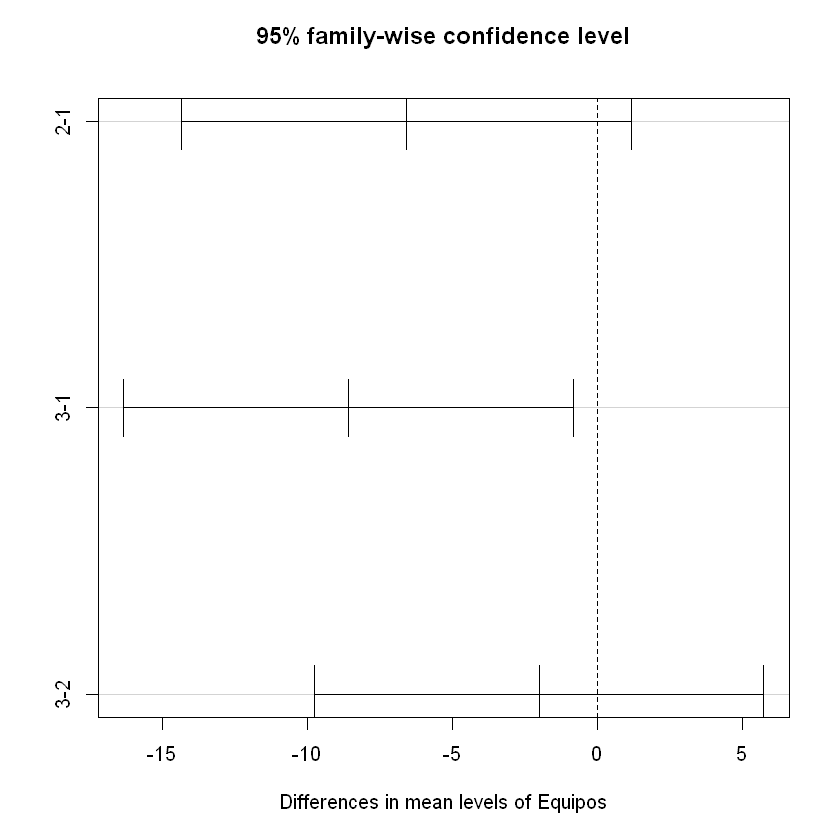

In [32]:
# Y el gráfico
plot(tk.aov.m)

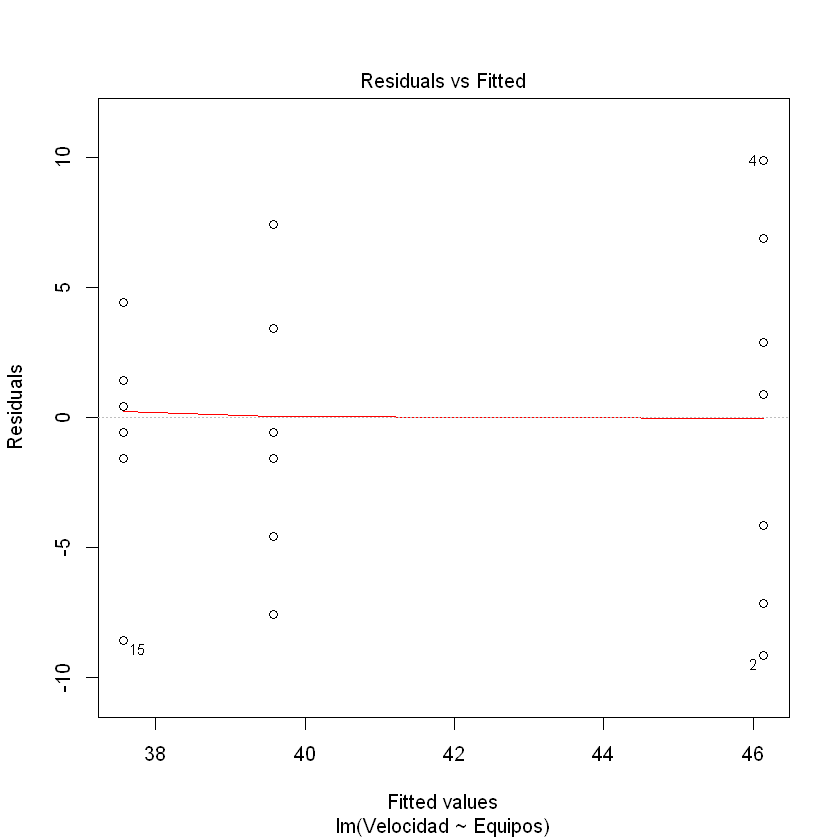

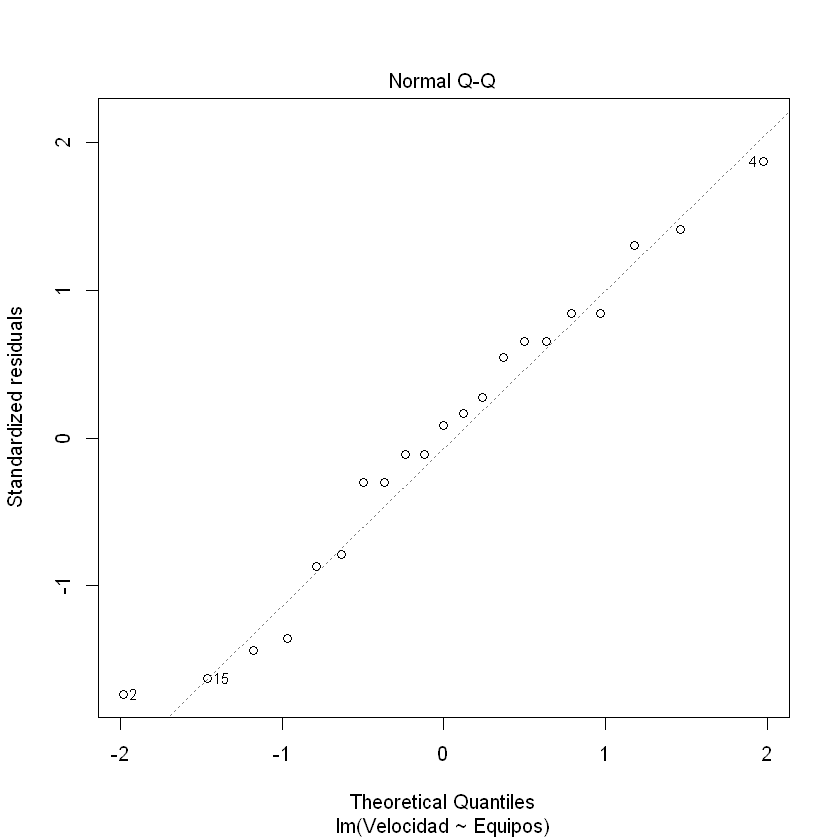

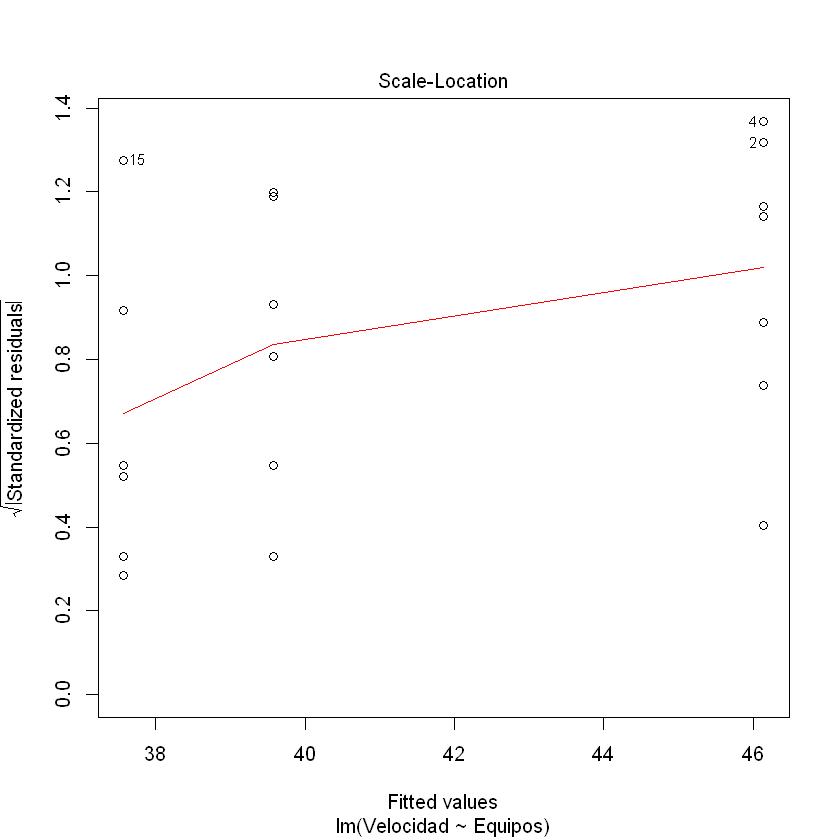

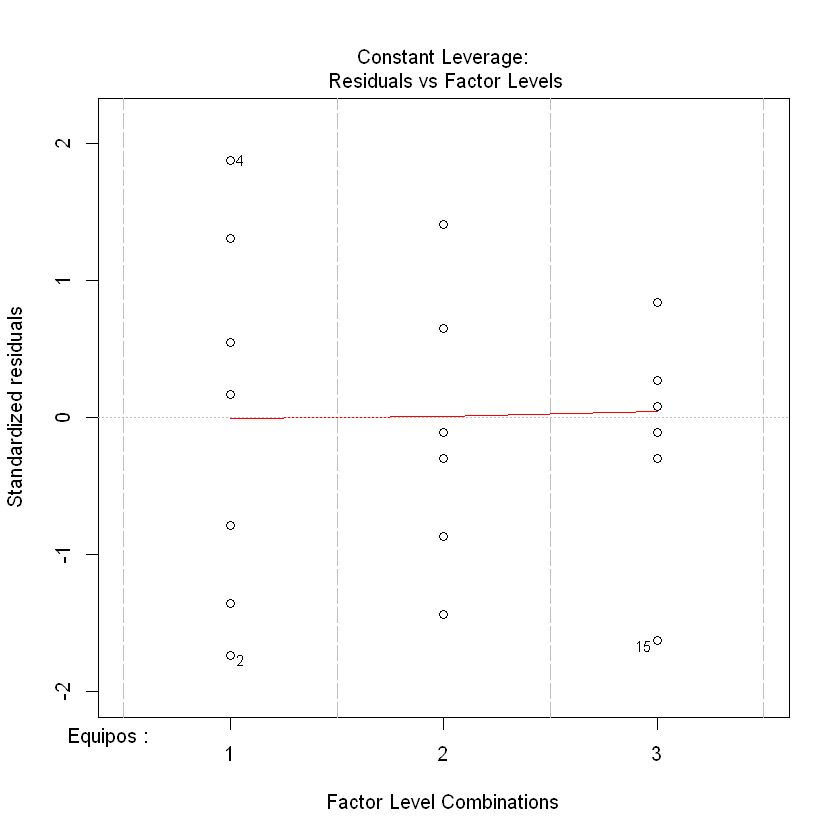

In [33]:
plot(m.aov)

Como podemos observar, la cantidad de equipos influye de una forma casi lineal a la velocidad. Esto nos hace inferir que la cantidad de equipos si influye de manera alta a la velocidad promedio en internet en cada equipo.

En resumen, entre menos equipos se tengan conectados a internet en una misma casa, la velocidad de internet tendera a estar en la media teorica.

## Bloques

Para el caso de diseño por bloques, se tomo como variable principal la cantidad de equipos accesando a internet y el tipo de conexión para ver como es la variación de velocidad. Por ende los datos se clasificaron de la siguiente manera:

|     |  A |  B |  C |
|-----|----|----|----|
| 1   | 43 | 54 | 37 |
| 2   | 37 | 48 | 38 |
| 3   | 31 | 44 | 32 |


In [84]:
# Cargamos los datos
tabla<-read.table("data/Bloques.txt",header = T,dec = ",", sep = "\t")
head(tabla)

Equipos,Conexion,Velocidad
1,A,43
1,B,54
1,C,37
2,A,37
2,B,48
2,C,38


In [85]:
# Hagamos la prueba
test<-aov(Velocidad~Conexion+Equipos,data=tabla)
summary(test)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Conexion     2 306.89  153.44   35.14 0.00114 **
Equipos      1 121.50  121.50   27.82 0.00326 **
Residuals    5  21.83    4.37                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [86]:
# El modelo
summary(lm(Velocidad~Conexion+Equipos,data=tabla))


Call:
lm(formula = Velocidad ~ Conexion + Equipos, data = tabla)

Residuals:
         1          2          3          4          5          6          7 
 1.500e+00  8.333e-01 -3.167e+00  4.274e-15 -6.667e-01  2.333e+00 -1.500e+00 
         8          9 
-1.667e-01  8.333e-01 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46.0000     2.0897  22.013 3.59e-06 ***
ConexionB    11.6667     1.7062   6.838  0.00102 ** 
ConexionC    -1.3333     1.7062  -0.781  0.46990    
Equipos      -4.5000     0.8531  -5.275  0.00326 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.09 on 5 degrees of freedom
Multiple R-squared:  0.9515,	Adjusted R-squared:  0.9224 
F-statistic:  32.7 on 3 and 5 DF,  p-value: 0.001037


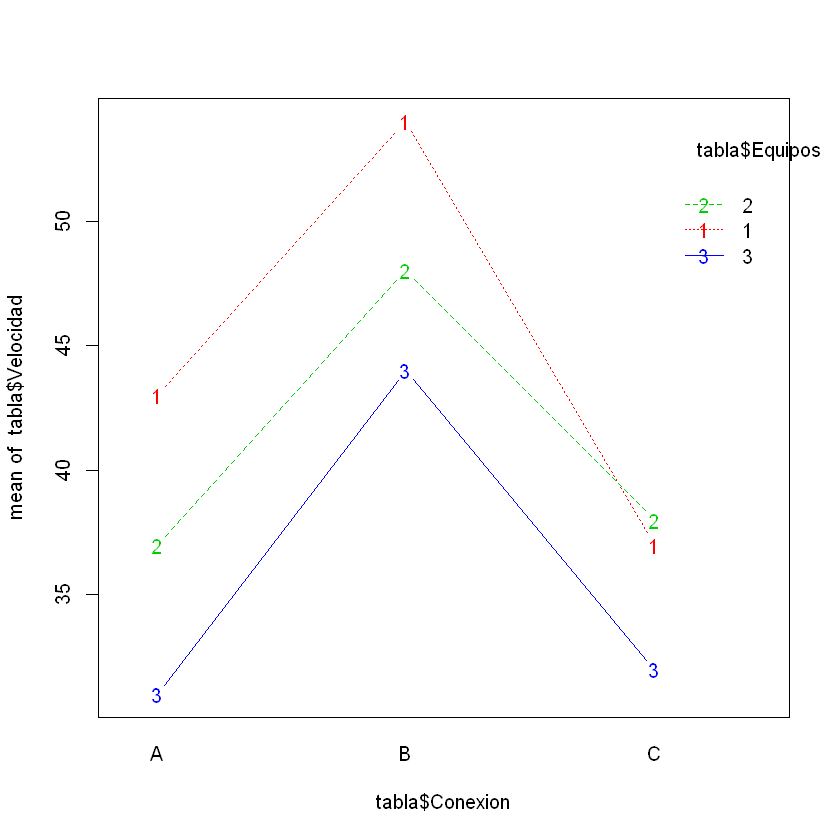

In [87]:
# Hay algo que debemos procurar mirar, la interacción
interaction.plot(tabla$Conexion,tabla$Equipos,tabla$Velocidad,type="b",col=c(2:4))

In [88]:
summary(lm(Velocidad~Conexion:Equipos,data=tabla))


Call:
lm(formula = Velocidad ~ Conexion:Equipos, data = tabla)

Residuals:
       1        2        3        4        5        6        7        8 
-0.25397  5.60317 -6.18254 -0.06349  0.65079  1.07937  0.12698 -2.30159 
       9 
 1.34127 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         49.444      3.492  14.159 3.16e-05 ***
ConexionA:Equipos   -6.190      1.833  -3.377   0.0197 *  
ConexionB:Equipos   -1.048      1.833  -0.572   0.5924    
ConexionC:Equipos   -6.262      1.833  -3.416   0.0189 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.96 on 5 degrees of freedom
Multiple R-squared:  0.8259,	Adjusted R-squared:  0.7214 
F-statistic: 7.906 on 3 and 5 DF,  p-value: 0.02411


Como podemos observar anteriormente, la conexion coaxial presenta una gran varianza entre sus datos, mientras que la conexion de fibra optica mantiene una media alta por encima de las demas conexiones. Por el lado de equipos podemos ver la baja cuantia de valores a mayor cantidad de equipos conectados, se ve una tendencia lineal entre las dos variables, es decir, se correlacionan en gran manera y ademas afectan de igual forma a la velocidad del internet

## Diseño Factorial

Para el caso de diseño por bloques, se tomo como variables principales el operador o empresa y el tipo de conexión para ver como es la variación de velocidad. Por ende los datos se clasificaron de la siguiente manera:

|     |  A |  B |  C |
|-----|----|----|----|
| X   | 42 | 54 | 44 |
| Y   | 46 | 51 | 38 |
| Z   | 39 | 46 | 34 |

In [73]:
# Cargamos los datos
tabla<-read.table("data/Factorial.txt",header = T,dec = ",", sep = "\t")
head(tabla)

Operador,Conexion,Velocidad
X,A,42
X,B,54
X,C,44
Y,A,46
Y,B,51
Y,C,38


In [74]:
# Hagamos la prueba
test<-aov(Velocidad~Conexion+Operador,data=tabla)
summary(test)

            Df Sum Sq Mean Sq F value Pr(>F)  
Conexion     2 213.56  106.78  15.376 0.0132 *
Operador     2  80.22   40.11   5.776 0.0662 .
Residuals    4  27.78    6.94                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [75]:
# El modelo
summary(lm(Velocidad~Conexion+Operador,data=tabla))


Call:
lm(formula = Velocidad ~ Conexion + Operador, data = tabla)

Residuals:
      1       2       3       4       5       6       7       8       9 
-3.2222  0.7778  2.4444  2.4444 -0.5556 -1.8889  0.7778 -0.2222 -0.5556 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   45.222      1.964  23.023 2.11e-05 ***
ConexionB      8.000      2.152   3.718   0.0205 *  
ConexionC     -3.667      2.152  -1.704   0.1636    
OperadorY     -1.667      2.152  -0.775   0.4818    
OperadorZ     -7.000      2.152  -3.253   0.0313 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.635 on 4 degrees of freedom
Multiple R-squared:  0.9136,	Adjusted R-squared:  0.8272 
F-statistic: 10.58 on 4 and 4 DF,  p-value: 0.0211


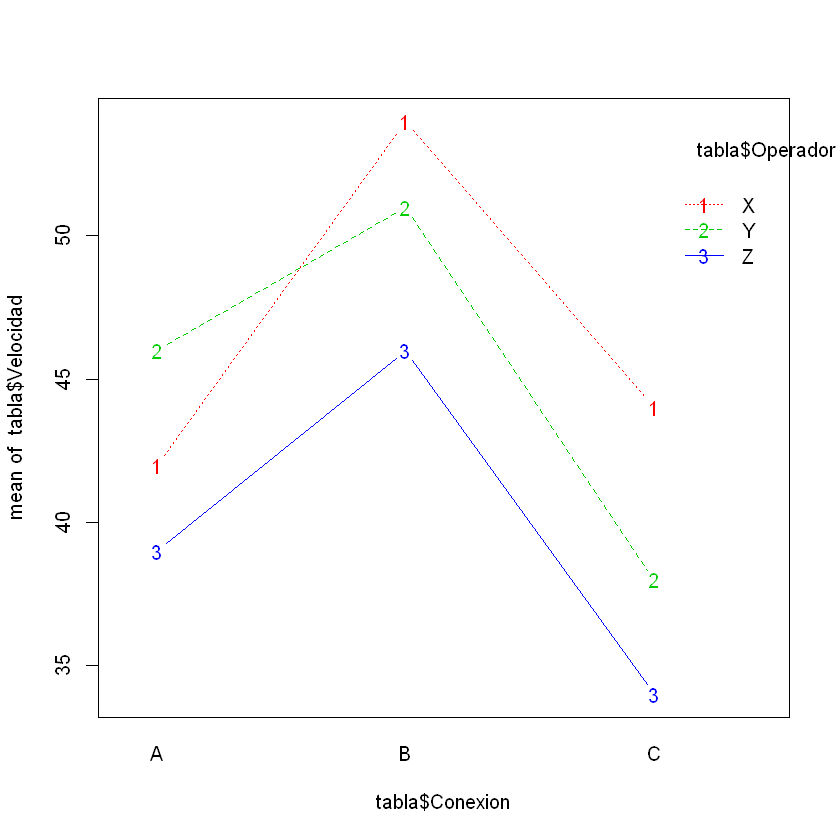

In [76]:
# Hay algo que debemos procurar mirar, la interacción
interaction.plot(tabla$Conexion,tabla$Operador,tabla$Velocidad,type="b",col=c(2:4))

In [77]:
summary(lm(Velocidad~Conexion:Operador,data=tabla))


Call:
lm(formula = Velocidad ~ Conexion:Operador, data = tabla)

Residuals:
ALL 9 residuals are 0: no residual degrees of freedom!

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)               34         NA      NA       NA
ConexionA:OperadorX        8         NA      NA       NA
ConexionB:OperadorX       20         NA      NA       NA
ConexionC:OperadorX       10         NA      NA       NA
ConexionA:OperadorY       12         NA      NA       NA
ConexionB:OperadorY       17         NA      NA       NA
ConexionC:OperadorY        4         NA      NA       NA
ConexionA:OperadorZ        5         NA      NA       NA
ConexionB:OperadorZ       12         NA      NA       NA
ConexionC:OperadorZ       NA         NA      NA       NA

Residual standard error: NaN on 0 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:    NaN 
F-statistic:   NaN on 8 and 0 DF,  p-value: NA


Analizando la grafica y las tablas de significancia, se nota como la diferencia entre operadores no es tan relevante a la hora de elegir una opcion, ademas de ello vemos que entre ambas variables no existe una corelación fuerte.

En resumen las dos variables son poco correlacionables entre si ademas que, la variable operador no muestra gran influencia en el resultado de la velocidad.

## Cuadrado Latino

Para el caso de Cuadrado Latino separamos los datos de esta forma en la cual se encuentra la media para cada factor.

| Empresa  | 1  | 2  | 3  | 
|----------|----|----|----|
| X        | A  | B  | C  | 
| _        | 43 | 53 | 39 | 
| Y        | B  | C  | A  | 
| _        | 55 | 41 | 42 | 
| Z        | C  | A  | B  |
| _        | 45 | 43 | 48 |

In [78]:
# Cargamos los datos
tabla<-read.table("data/CL.txt",header = T,dec = ",", sep = "\t")
head(tabla)

Conexion,Operador,Equipos,Velocidad
A,X,1,43
A,Y,3,42
A,Z,2,43
B,X,2,53
B,Y,1,55
B,Z,3,48


In [79]:
# Convirtamos en factor los número de Material y Operario
attach(tabla)
Operador<-as.factor(Operador)
Equipos<-as.factor(Equipos)
is.factor(Conexion)

The following objects are masked _by_ .GlobalEnv:

    Equipos, Operador

The following objects are masked from tabla (pos = 3):

    Conexion, Equipos, Operador, Velocidad

The following objects are masked from tabla (pos = 4):

    Conexion, Equipos, Operador, Velocidad

The following objects are masked from data (pos = 5):

    Equipos, Velocidad

The following objects are masked from data (pos = 6):

    Equipos, Velocidad

The following objects are masked from data (pos = 7):

    Equipos, Velocidad

The following objects are masked from data (pos = 8):

    Conexion, Velocidad



[1] TRUE

In [80]:
# El modelo
model1<-aov(Velocidad~Operador+Equipos+Conexion)
summary(model1)

            Df Sum Sq Mean Sq F value Pr(>F)  
Operador     2   1.56    0.78   0.143 0.8750  
Equipos      2  32.89   16.44   3.020 0.2487  
Conexion     2 194.89   97.44  17.898 0.0529 .
Residuals    2  10.89    5.44                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [81]:
# Las tablas de medias
model.tables(model1, "mean")

Tables of means
Grand mean
         
45.44444 

 Operador 
Operador
   X     Y     Z  
45.00 46.00 45.33 

 Equipos 
Equipos
    1     2     3 
47.67 45.67 43.00 

 Conexion 
Conexion
   A     B     C  
42.67 52.00 41.67 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Velocidad ~ Operador + Equipos + Conexion)

$Operador
            diff       lwr      upr     p adj
Y -X   1.0000000 -10.22282 12.22282 0.8682481
Z -X   0.3333333 -10.88949 11.55615 0.9834048
Z -Y  -0.6666667 -11.88949 10.55615 0.9367883

$Equipos
         diff       lwr      upr     p adj
2-1 -2.000000 -13.22282 9.222819 0.6227159
3-1 -4.666667 -15.88949 6.556152 0.2331330
3-2 -2.666667 -13.88949 8.556152 0.4816971

$Conexion
            diff        lwr        upr     p adj
B -A    9.333333  -1.889486 20.5561523 0.0707078
C -A   -1.000000 -12.222819 10.2228189 0.8682481
C -B  -10.333333 -21.556152  0.8894856 0.0584504


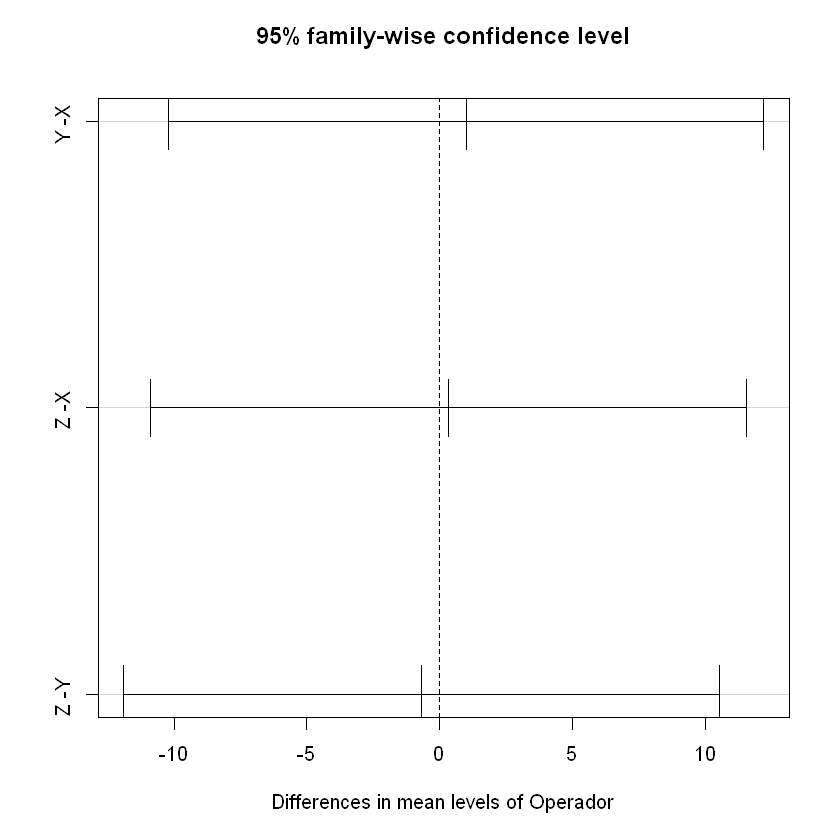

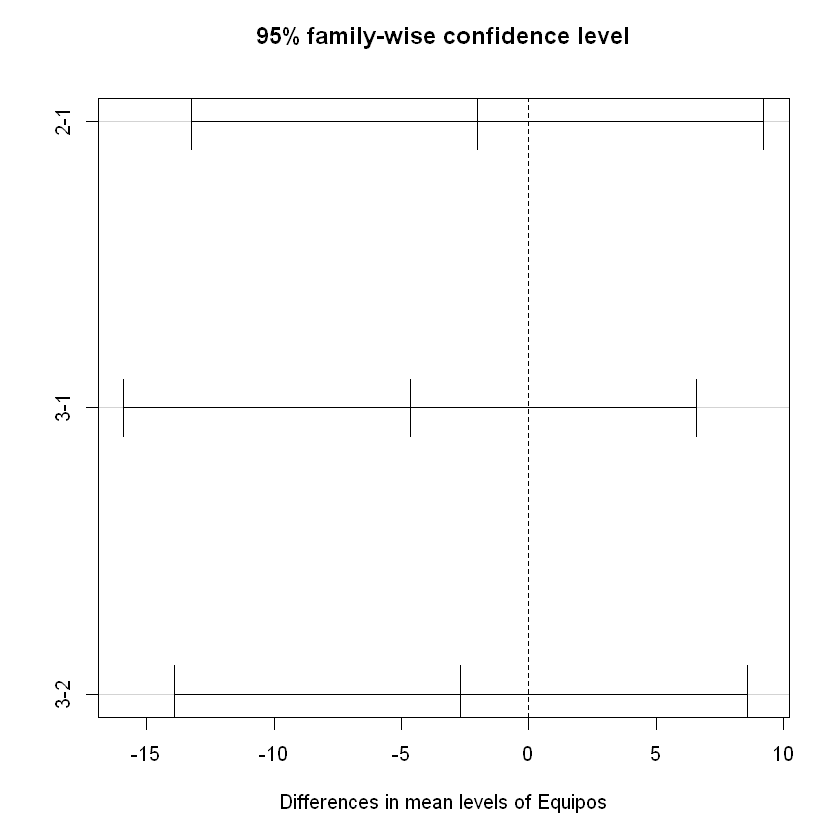

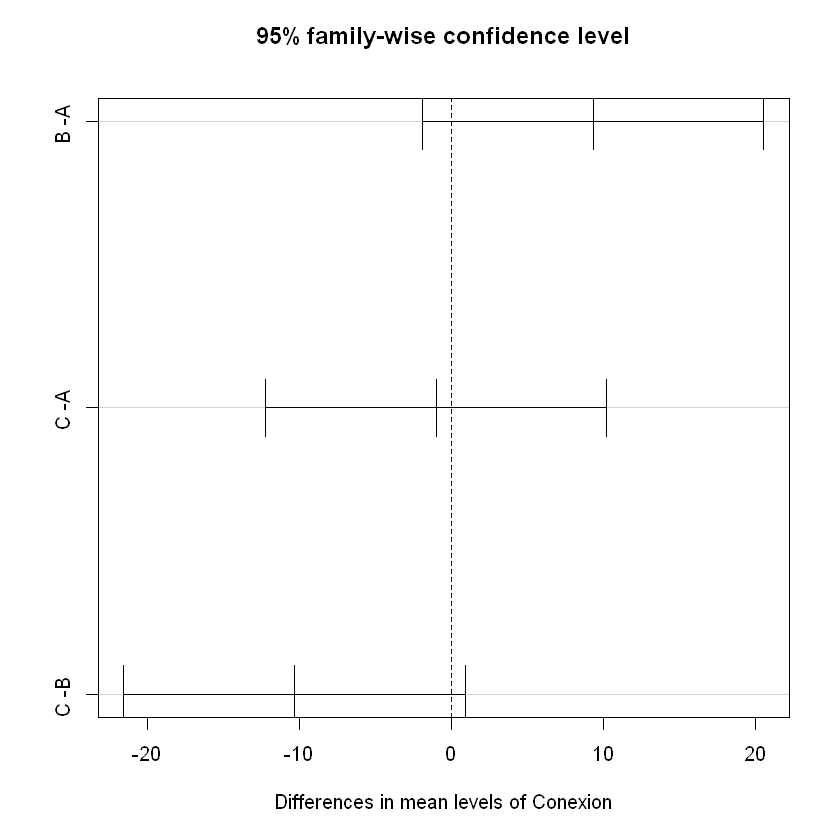

In [82]:
# La prueba de Tukey
TukeyHSD(model1)
plot(TukeyHSD(model1))

Para terminar la pruebas sobre el ejercicio, estas ultimas graficas muestran la relacion global entre las variables propuestas inicialmente. A lo largo del desarrollo de este ejercicio se pudo observar como era la relacion entre variables de forma unica, juntas y ahora ene sta ultima entre todas. Como conclusion se puede ver que las empresas aportan un servicio casi igual, y que lo mas importante es tipo de conexion y la cantidad de equipos abscritos a este servicio por casa.